<a href="https://colab.research.google.com/github/CibeleYamada/python_xpe_bootcamp/blob/main/Pte2_3_2_Indexa%C3%A7%C3%A3o_usando_o_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INDEXAÇÃO COM O PANDAS**

- Método iloc()
- Método loc()

--> Indexação booleana

**Indexação Direta**

- nome_do_dataframe['nome da coluna']
- retorna um Panda series, ou seja, uma estrutura de dados unidimensional.

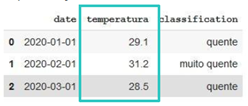

- Se quisermos extrair 2 colunas, basta colocar os nomes das colunas separados por vírgula:

nome_do_dataframe[['temperatura', 'classification']]

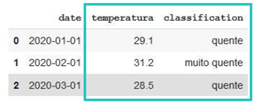

**Método iloc()**

- quando queremos pegar colunas ou linhas específicas;
- é similar à indexação no numpy.
- acessa os dados a partir dos índices da linha e da coluna.

*nome_do_dataframe***.iloc***[índice da linha, índice da coluna]*

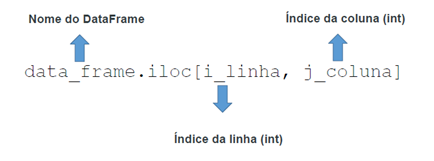

Assim como o numpy, se quisermos fazer um *slice*, acessando mais de um elemento simultaneamente, também podemos acessar pelo índice, utilizando o iloc().

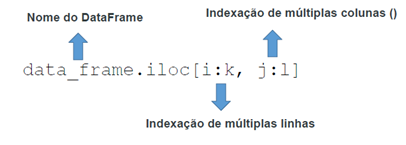

Nesse caso, pegamos as linhas que vão de *i* até *k-1* (já que a linha k não entra), e as colunas de *j* a *l-1* (j também não entra)

**Método loc()**

- é um método novo do Pandas;
- no numpy e no método iloc(), a indexação ocorria pelo valor (índice) da linha ou da coluna; já no método loc(), a indexação é pelo *nome da linha ou da coluna*.


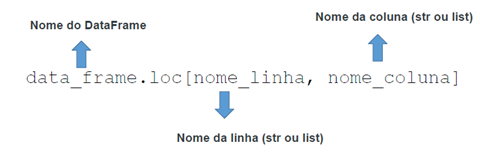

**Indexação Booleana**

- é uma operação de filtragem; filtra elementos que contenham uma condição específica.
- retorna uma lista com os dados em que a condição é verdadeira.

Exemplo:

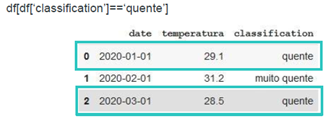

**PRÁTICA**

Preparação:

In [25]:
import pandas as pd

In [24]:
df = pd.read_csv('https://pycourse.s3.amazonaws.com/temperature.csv')
df

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


**PRÁTICA DE INDEXAÇÃO DIRETA**

In [4]:
# Seleção de uma coluna: nome_do_dataframe['nome da coluna']

df['date']

0    2020-01-01
1    2020-02-01
2    2020-03-01
3    2020-04-01
4    2020-05-01
5    2020-06-01
Name: date, dtype: object

In [6]:
# só para verificar o tipo de dado que ele retornou: ele retorna um panda series

type(df['date'])

pandas.core.series.Series

In [8]:
# Seleção de múltiplas colunas; precisa colocar 2 colchetes

df[['date', 'temperatura']]

,date,temperatura
0,2020-01-01,29.1
1,2020-02-01,31.2
2,2020-03-01,28.5
3,2020-04-01,28.0
4,2020-05-01,24.0
5,2020-06-01,20.0


In [9]:
# retorna um pandas dataframe

type(df[['date', 'temperatura']])

pandas.core.frame.DataFrame

**PRÁTICA DE INDEXAÇÃO POR ÍNDICES/NOMES - MÉTODOS ILOC E LOC**

In [11]:
#Método iloc: selecionando todas as linhas e a coluna 1 (temperatura) - lembrando que a primeira coluna tem índice 0 (zero)

df.iloc[:, 1]

0    29.1
1    31.2
2    28.5
3    28.0
4    24.0
5    20.0
Name: temperatura, dtype: float64

In [12]:
# Método loc: indexação por nome

df.loc[:, 'temperatura']

0    29.1
1    31.2
2    28.5
3    28.0
4    24.0
5    20.0
Name: temperatura, dtype: float64

In [13]:
# Indexação de múltiplas colunas com método iloc:

df.iloc[:, 1:3]

,temperatura,classification
0,29.1,quente
1,31.2,muito quente
2,28.5,quente
3,28.0,quente
4,24.0,confortavel
5,20.0,frio


In [14]:
# Indexação de múltiplos elementos com método loc:

df.loc[:, ['temperatura', 'classification']]

,temperatura,classification
0,29.1,quente
1,31.2,muito quente
2,28.5,quente
3,28.0,quente
4,24.0,confortavel
5,20.0,frio


In [15]:
df.loc[:, 'temperatura':]

,temperatura,classification
0,29.1,quente
1,31.2,muito quente
2,28.5,quente
3,28.0,quente
4,24.0,confortavel
5,20.0,frio


**INDEXAÇÃO BOOLEANA**

In [17]:
# Antes de fazer a indexação, note os tipos de dados do dataframe:
# os dados da coluna 'date' estão como 'object'

df.dtypes

date               object
temperatura       float64
classification     object
dtype: object

In [19]:
# Vamos alterar o tipo de dado do 'date': tranformando o tipo da coluna date para datetime.
# Método pd.to_datetime()

df['date'] = pd.to_datetime(df['date'])

df.dtypes

date              datetime64[ns]
temperatura              float64
classification            object
dtype: object

In [28]:
# Antes de entrar em indexação booleana, também vamos setar o índice: fazer uma coluna virar o nosso index.
# não sei porquê não está dando certo.

df = df.set_index('date')

KeyError: ignored

In [29]:
# O bloco de cima acusa erro, mas deu certo. A coluna 'date' aparece em negrito, e com isso, todas as outras colunas estão indexadas a ele.

df.head()

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel


**Indexação booleana**

In [30]:
# Seleção de temperaturas acima de 25 graus:

df[df['temperatura'] >= 25]

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente


In [31]:
# Indexação booleana considerando datetime com entradas até 01 de março de 2020:
# esse tipo de verificação não daria certo se dos dados estivessem como object

df[df.index <= '2020-03-01']

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente


In [32]:
# Seleção de entradas com datetime até 01 de março de 2020 E somente a coluna 'classification'

df.iloc[df.index <= '2020-03-01', [-1]]

,classification
date,
2020-01-01,quente
2020-02-01,muito quente
2020-03-01,quente


In [33]:
# ou:

df.loc[df.index <= '2020-03-01', ['classification']]

,classification
date,
2020-01-01,quente
2020-02-01,muito quente
2020-03-01,quente
